## Analyzing Trends on Spotify Music
The primary dataset I have worked on contains information related to top trending music on Spotify. It gives information like year it was released, beats per minute, danceability of the song, loudness of the song, duration of the song, aocustics of the song etc. The various information represented by this dataset allows for some interesting trends and patterns to be seen in the data.

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import bqplot
import pandas as pd
import geopandas
import ipywidgets
import contextily as ct
import bqplot.pyplot

Primary dataset reference :
     https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year. 
    (There is a need for logging in, in order to view the data.)

In [2]:
#Importing the data set using relative path. I also used encoding of the file to ensure it got read into my variable
data= pd.read_csv("top10s.csv",encoding="ISO-8859-1") 

In [3]:
data

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [4]:
#Removing the Unnamed column by re reading the dataset again
data= pd.read_csv("top10s.csv", index_col=0, encoding="ISO-8859-1") 
data

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [5]:
#After importing the dataset into my variable, I could not see a lot of missing values in the first glance. Yet, I handled missing values if any, by implementing the below code
data=data.fillna({'title':'unknown','artist':'unknown','top genre':'unknown','year':'unknown','bmp':'unknown','nrgy':'unknown','dnce':'unknown','dB':'unknown','live':'unknown','val':'unknown','dur':'unknown','acous':'unknown','spch':'unknown','pop':'unknown'})
data

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [6]:
#Creating a pivot table to show help create interactive grids in the following steps
mypivot = pd.pivot_table(data,index="artist",columns="top genre",values="dur",aggfunc='mean',fill_value=0)
mypivot

top genre,acoustic pop,alaska indie,alternative r&b,art pop,atl hip hop,australian dance,australian hip hop,australian pop,barbadian pop,baroque pop,...,house,indie pop,irish singer-songwriter,latin,metropopolis,moroccan pop,neo mellow,permanent wave,pop,tropical house
artist,,,,,,,,,,,,,,,,,,,,,
3OH!3,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0
5 Seconds of Summer,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0
A Great Big World,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,229.0,0.0,0.0,0
Adam Lambert,0,0,0,0.0,0,0,0,227.5,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0
Adele,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAYN,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0
Zara Larsson,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0
Zedd,0,0,0,0.0,0,0,0,0.0,0,0,...,0,0.0,0,0,0,0,0.0,0.0,0.0,0


In [7]:
#Plotting a bar chart
#X and Y Scales for the plot
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

#Axes for the plot
ax_xb = bqplot.Axis(scale = x_scale, label = 'Year')
ax_yb = bqplot.Axis(scale = y_scale, label = 'Total duration', orientation= 'vertical')

#Mark
bp = bqplot.pyplot.bar(x = [], y = [], scales={'x': x_scale, 'y': y_scale})
figurebar = bqplot.Figure(marks = [bp], axes=[ax_xb, ax_yb])

In [8]:
#First finding average Energy of each genre
avgnrgy=data.groupby("top genre")["nrgy"].mean()
avgnrgy

top genre
acoustic pop                 61.000000
alaska indie                 34.000000
alternative r&b              40.000000
art pop                      60.125000
atl hip hop                  82.200000
australian dance             72.000000
australian hip hop           72.000000
australian pop               74.400000
barbadian pop                68.466667
baroque pop                  69.000000
belgian edm                  67.000000
big room                     77.200000
boy band                     80.266667
british soul                 51.090909
brostep                      77.500000
canadian contemporary r&b    64.777778
canadian hip hop             53.000000
canadian latin               47.000000
canadian pop                 68.117647
candy pop                    86.000000
celtic rock                  87.000000
chicago rap                  69.000000
colombian pop                83.333333
complextro                   78.500000
contemporary country         59.000000
dance pop      

In [9]:
#Next finding the average danceability of all songs in each genre
avgdnce=data.groupby("top genre")["dnce"].mean()
avgdnce

top genre
acoustic pop                 42.500000
alaska indie                 51.000000
alternative r&b              90.000000
art pop                      52.375000
atl hip hop                  59.800000
australian dance             45.833333
australian hip hop           91.000000
australian pop               64.000000
barbadian pop                62.066667
baroque pop                  52.500000
belgian edm                  72.000000
big room                     60.900000
boy band                     63.800000
british soul                 52.727273
brostep                      60.500000
canadian contemporary r&b    54.555556
canadian hip hop             78.000000
canadian latin               80.000000
canadian pop                 63.735294
candy pop                    69.500000
celtic rock                  42.000000
chicago rap                  63.000000
colombian pop                76.333333
complextro                   61.166667
contemporary country         47.000000
dance pop      

In [10]:
#Next finding the average beats per minute of all songs in each genre
avgbpm = data.groupby("top genre")["bpm"].mean()
avgbpm

top genre
acoustic pop                 155.000000
alaska indie                 132.000000
alternative r&b              136.000000
art pop                      115.125000
atl hip hop                  102.800000
australian dance             128.833333
australian hip hop            95.000000
australian pop               153.800000
barbadian pop                125.333333
baroque pop                  146.000000
belgian edm                  122.000000
big room                     122.300000
boy band                     116.133333
british soul                 116.727273
brostep                      121.000000
canadian contemporary r&b    127.000000
canadian hip hop             109.000000
canadian latin                98.000000
canadian pop                 121.500000
candy pop                    109.000000
celtic rock                   85.000000
chicago rap                  125.000000
colombian pop                126.000000
complextro                   120.333333
contemporary country          

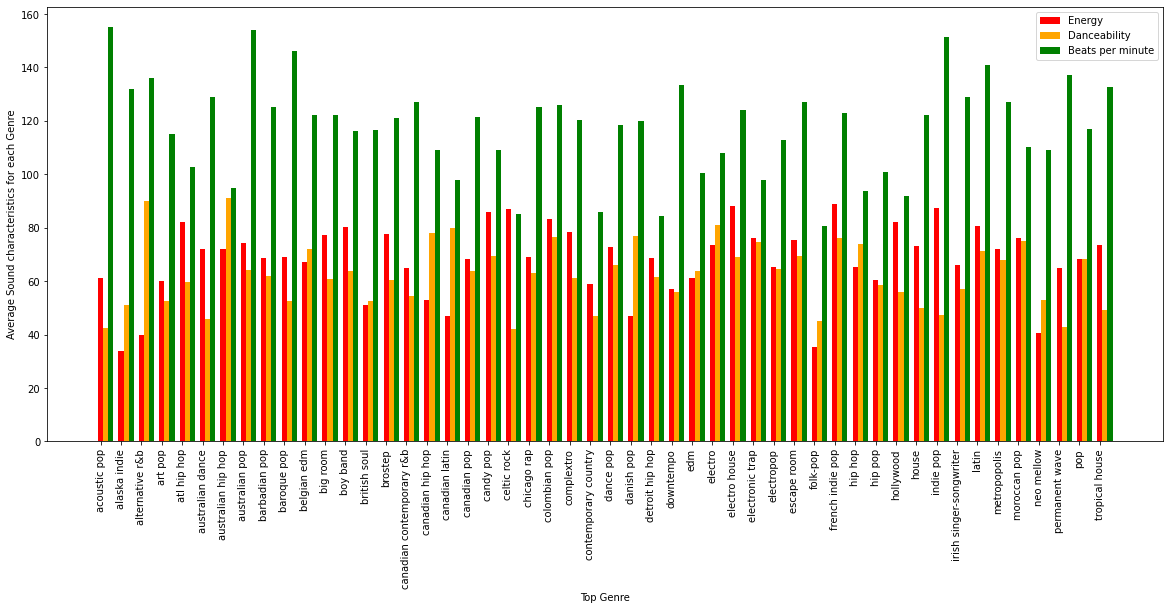

In [11]:
#Now I plotted all the above sound characteristics into a grouped bar chart to show characteristics of each genre

fig,ax = plt.subplots(figsize=(20,8))
a1 = avgnrgy.reset_index()
a2 = avgdnce.reset_index()
a3 = avgbpm.reset_index()

x_axis = np.arange(len(a1['top genre']))

plt.bar(x_axis , a1['nrgy'], color = 'Red', width =0.25)
plt.bar(x_axis+0.25 , a2['dnce'], color = 'Orange', width =0.25)
plt.bar(x_axis+0.5 , a3['bpm'], color = 'Green', width =0.25)

plt.xticks(x_axis, a1['top genre'])

ax.set_xlabel("Top Genre")
ax.set_ylabel("Average Sound characteristics for each Genre")

ax.legend(labels=['Energy', 'Danceability','Beats per minute'])
plt.xticks(rotation=90)
plt.show()

#Code referred from : https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/ and Project Part 1 of submission


### Summary
The above multiple bar chart shows the average sound characteristics of Top genres on Spotify. The characteristics are Energy, Danceability and Beats per minute. The visualization compares all three characteristics of each genre with each bar representing a characteristics and shows insights on the same. For example, Acoustic Pop has a higher beats per minute range when compared to the energy of songs in the same genre. Folk Pop has the least energy characteristics when compare to all other genres.

In [12]:
#Reading contextual data
music_data = pd.read_csv("albums.csv")

#Reference link to dataset: Music Label Dataset. It can be found here https://www.kaggle.com/datasets/revilrosa/music-label-dataset. A login is needed to access this dataset.

In [13]:
#Displaying the dataset read in
music_data.head()

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0


In [14]:
music_data

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...
994,995,36617,Try Cadillac,Pop,2006,9,10494,2.5,1.5,4.0
995,996,9130,Lover Detailed,Pop,2005,9,980886,1.0,5.0,2.0
996,997,15017,Arabia Bulgaria Intelligent Panther Tiny,Pop,2019,8,886043,4.0,3.0,4.0
997,998,25844,I Gotta Feeling Brawny,Pop,2002,4,735898,1.5,3.5,1.5


In [15]:
#Finding the average Rolling Stone critic of all songs in each genre
avgrollingstone_critic=music_data.groupby("genre")["rolling_stone_critic"].mean()
avgrollingstone_critic

genre
Alternative     3.125000
Ambient         2.750000
Black Metal     3.204545
Blues           3.470588
Boy Band        3.125000
Brit-Pop        2.782609
Compilation     2.520833
Country         2.781250
Dance           2.840426
Death Metal     2.804348
Deep House      3.058824
Electro-Pop     3.062500
Folk            2.433333
Gospel          2.537037
Hard Rock       3.074074
Heavy Metal     2.519231
Holy Metal      2.687500
Indie           2.833333
Indietronica    2.636364
J-Rock          2.380952
Jazz            2.916667
K-Pop           2.789474
Latino          2.552632
Live            1.454545
Lounge          2.761905
Metal           3.000000
Parody          3.133333
Pop             2.681250
Pop-Rock        2.750000
Progressive     2.794118
Punk            3.241935
Rap             2.672131
Retro           2.342105
Rock            2.756098
Techno          2.750000
Trap            3.138889
Unplugged       2.107143
Western         2.650000
Name: rolling_stone_critic, dtype: float64

In [16]:
#Finding the average MTV critic of all songs in each genre
avgmtv_critic=music_data.groupby("genre")["mtv_critic"].mean()
avgmtv_critic

genre
Alternative     2.916667
Ambient         2.750000
Black Metal     3.340909
Blues           2.705882
Boy Band        3.437500
Brit-Pop        2.608696
Compilation     2.479167
Country         3.187500
Dance           2.989362
Death Metal     2.891304
Deep House      2.441176
Electro-Pop     2.500000
Folk            3.266667
Gospel          2.500000
Hard Rock       3.351852
Heavy Metal     3.000000
Holy Metal      2.812500
Indie           2.983871
Indietronica    2.750000
J-Rock          3.142857
Jazz            3.250000
K-Pop           2.657895
Latino          2.592105
Live            2.590909
Lounge          2.880952
Metal           3.090909
Parody          2.466667
Pop             2.743750
Pop-Rock        2.779412
Progressive     2.852941
Punk            2.322581
Rap             2.663934
Retro           2.552632
Rock            2.719512
Techno          2.777778
Trap            2.750000
Unplugged       2.571429
Western         1.725000
Name: mtv_critic, dtype: float64

In [17]:
#Finding the average MTV critic of all songs in each genre
avgmusicmaniac_critic=music_data.groupby("genre")["music_maniac_critic"].mean()
avgmusicmaniac_critic

genre
Alternative     2.479167
Ambient         3.050000
Black Metal     2.659091
Blues           2.705882
Boy Band        2.937500
Brit-Pop        3.173913
Compilation     2.541667
Country         2.968750
Dance           2.946809
Death Metal     2.608696
Deep House      2.441176
Electro-Pop     3.031250
Folk            2.733333
Gospel          2.962963
Hard Rock       2.722222
Heavy Metal     3.038462
Holy Metal      2.656250
Indie           2.779570
Indietronica    2.590909
J-Rock          2.904762
Jazz            2.638889
K-Pop           2.921053
Latino          3.078947
Live            3.636364
Lounge          2.571429
Metal           2.704545
Parody          3.033333
Pop             2.812500
Pop-Rock        3.000000
Progressive     2.176471
Punk            2.951613
Rap             2.647541
Retro           2.605263
Rock            2.670732
Techno          3.138889
Trap            2.916667
Unplugged       2.035714
Western         2.825000
Name: music_maniac_critic, dtype: float64

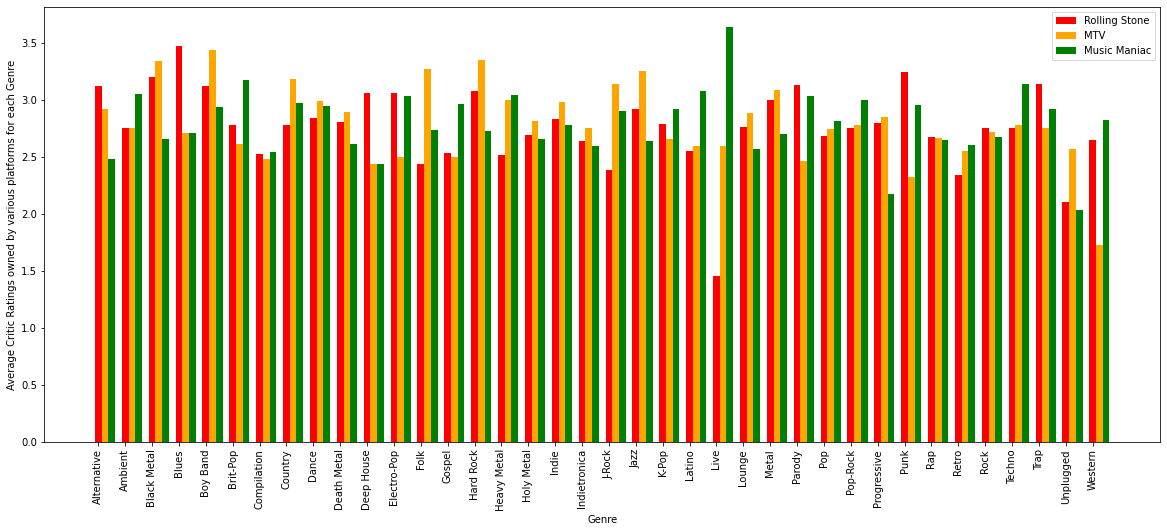

In [18]:
#Now I plotted all the above average review ratings into a grouped bar chart to show and compare various ratings for each genre
fig,ax = plt.subplots(figsize=(20,8))
a1 = avgrollingstone_critic.reset_index()
a2 = avgmtv_critic.reset_index()
a3 = avgmusicmaniac_critic.reset_index()

x_axis = np.arange(len(a1['genre']))

plt.bar(x_axis , a1['rolling_stone_critic'], color = 'Red', width =0.25)
plt.bar(x_axis+0.25 , a2['mtv_critic'], color = 'Orange', width =0.25)
plt.bar(x_axis+0.5 , a3['music_maniac_critic'], color = 'Green', width =0.25)

plt.xticks(x_axis, a1['genre'])

ax.set_xlabel("Genre")
ax.set_ylabel("Average Critic Ratings owned by various platforms for each Genre")

ax.legend(labels=['Rolling Stone', 'MTV','Music Maniac'])
plt.xticks(rotation=90)
plt.show()

### Summary
Similar to the previous visualization on the Spotify dataset, this visualization compares the various critic ratings offered by platforms : Rolling Stone, MTV, Music Maniac for each Genre of Music Albums. The multiple bar chart allows the user to directly compare the values for each of these critic ratings and draw insights from them. For example. "Live" genre of music has recieved the highest ratings from "Music maniac" when compared to all other platforms. Boy Band genre has received a higher MTV critic rating than Rolling Stone and Music Maniac.

In [19]:
#Defining bins to make bar charts with interactivity. THis will help obtain information on the various characteristics of music
bin_field= ["top genre","artist"]
music_bin=["Energy","Danceability","Beats Per Minute"]

In [23]:
#Code reference: akshari_nidugala_Week4Assignment.ipynb
@ipywidgets.interact(Field = bin_field, Music=music_bin, style=plt.style.available)
def make_plot(style, Field, Music):
    with plt.style.context(style): 
        fig, ax = plt.subplots(1,1,figsize=(15,5))
        if Music in ["Energy"]:
            df=data.groupby(Field)["dur"].sum()
            df2=data.groupby(Field)["nrgy"].sum()
            ax.bar(df.index,df.values)
            ax.bar(df2.index,df2.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Energy compared to Duration of Song")
            ax.legend(labels=['Duration', 'Energy'])
        
        elif Music in ["Danceability"]:
            df3=data.groupby(Field)["dur"].sum()
            df4=data.groupby(Field)["dnce"].sum()
            ax.bar(df3.index,df3.values)
            ax.bar(df4.index,df4.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Danceability compared to Duration of Song")
            ax.legend(labels=['Duration', 'Danceability'])
        
        else :
            df5=data.groupby(Field)["dur"].sum()
            df6=data.groupby(Field)["bpm"].sum()
            ax.bar(df5.index,df5.values)
            ax.bar(df6.index,df6.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Beats per minute compared to Duration of Song")
            ax.legend(labels=['Duration', 'Beats per minute'])
         
    plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

### Summary
The previous visualization is changed slightly to incorporate interactivity into the visualization. The interactivity allows the user to customize the visualization based on how he/she wishes to look at it. This makes the interaction of the visualization with the end user more flexible.

The first dropdown interactivity offers the user to select from all available graphs. This allows the user to view the graph based on his or her preference of color combinations and style. The second dropdown interactivity offers the user a choice to select the field to be shown on the x axis. The choice is offered between "Top Genre" and "Artist". The third dropdown interactivity offers the user a choice to select the type of music characteristics to be shown on the y axis. The choice is offered between "Energy", "Danceability" and "Beats per minute". 

All these dropdowns are independent of each other in terms of working.

An example of the working of the interactivity is: The user wishes to view a comparison of Durations and Beats per minute for all Genres in a classic style of view. The user selects "Classic", "top genre" from Field dropdown, and "Beats per minute" from the Music dropdown. The user can see various insights from the visualization after selecting the filters. Like, Dance pop genre has the highest danceability and the highest duration when compared to all other genres. Pop genre follows next with the second highest duration, followed by canadian pop genre.

In [24]:
#Creating an interactive dashboard using my primary dataset. 
#The intent is to display total duration of music that is owned by an artist and its corresponding Top Genre and showing its duration over the years.
#Code reference: nidugala_akshari_homework6.ipynb

# Creating a scale for my bar plot
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

#Axes for the plot
ax_xb = bqplot.Axis(scale = x_scale, label = 'Year')
ax_yb = bqplot.Axis(scale = y_scale, label = 'Total duration', orientation= 'vertical')

#Mark
bp = bqplot.pyplot.bar(x = [], y = [], scales={'x': x_scale, 'y': y_scale})
figurebar = bqplot.Figure(marks = [bp], axes=[ax_xb, ax_yb])


In [25]:
#Preparing the heat map for my data and pivot table
#1. data(mypivot)

#2. Scales
col_sc = bqplot.ColorScale(scheme='RdBu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale() 

#3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Top Genre')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Artist')
                   
#4. Marks
heat_map = bqplot.GridHeatMap(color=mypivot.values, 
                             row = mypivot.index, column = mypivot.columns, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'green'})
                   
def barplot_fig(x, y):
    df2 = data[(data['top genre'] == y) & (data['artist'] == x)]
    df2 = df2[df2['year'] != 0]
    df2 = df2.groupby('year')['dur'].sum()
    return df2
                   
# 5. Linking 
mySelectedLabel = ipywidgets.Label()
def on_selected(change):
    if len(change['owner'].selected) == 1: # only allow user to select 1 bin
        i,j = change['owner'].selected[0]
        v = mypivot.values[i,j] # data value in that bin
        mySelectedLabel.value = 'Mean Duration for Artist: ' + mypivot.index[i] + ' and Top Genre: ' + mypivot.columns[j] + ' = ' + str(v)
        top_new = barplot_fig(mypivot.index[i], mypivot.columns[j])
     
        bp.x = top_new.index
        bp.y = top_new.values
heat_map.observe(on_selected, 'selected')


# 6. figure!
fig = bqplot.Figure(marks=[heat_map], axes=[col_ax, x_ax, y_ax])
fig.layout.min_width='800px'
figurebar.layout.min_width = '800px'
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard_final = ipywidgets.VBox([myDashboard, figurebar])
myDashboard_final

### Summary
The above dashboard comprises of two visualizations that are linked together. This dashboard contains a heat map linked to a bar chart that populates on a click. The heat map is built in the format of a grid. The cells in the grid have different shades of red and blue as the color scheme. The bar chart shows the total duration of the corresponding selected artist and top genre in the relevant year.

The dashboard is interactive and hence very user friendly. It strives to show duration related information of Top Songs on Spotify on a click. When the user clicks on a particular cell in the grid heat map (The upper half of the dashboard), the link describes the cell selected. It will say "Mean Duration for Artist: Selena Gomez and Top Genre: dance pop = 215.75". This translates to : Artist Selena Gomez has devoted a mean duration of 215.75 seconds onto the genre Dance Pop. This can then be looked up in the bar chart that populates in the bottom half of the visualization that defines the year against which the duration can be described. In this case, this duration was reported for the year 2013-2018. In conclusion, the bar chart shows the total mean of all songs launched by a particular Artist in a specific genre for a certain year.

In [25]:
#Working on my contextual music dataset
#music_album = music_data.groupby("genre")["artist_id"].sum()

In [26]:
#Creating bins to bring interactive bar plots that show
specs_bin = ["genre","year_of_pub"]
critic_bin = ["rolling_stone_critic","mtv_critic","music_maniac_critic"]

In [27]:
@ipywidgets.interact(Field = specs_bin, style=plt.style.available, Critic=critic_bin)
def make_plot2(style,Field,Critic):
    with plt.style.context(style): 
        fig, ax = plt.subplots(1,1,figsize=(25,10))
        
        if Critic in ['rolling_stone_critic']:
            df=music_data.groupby(Field)["num_of_tracks"].sum()
            df2=music_data.groupby(Field)["rolling_stone_critic"].sum()
            ax.bar(df.index,df.values)
            ax.bar(df2.index,df2.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Number of Tracks sold compared to Critics by Rolling Stones")
            ax.legend(labels=['Number of Tracks Sold', 'Rolling Stone Critic'])
            
        elif Critic in ['mtv_critic']:
            df3=music_data.groupby(Field)["num_of_tracks"].sum()
            df4=music_data.groupby(Field)["mtv_critic"].sum()
            ax.bar(df3.index,df3.values)
            ax.bar(df4.index,df4.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Number of Tracks sold compared to Critics by MTV")
            ax.legend(labels=['Number of Tracks Sold', 'MTV Critic'])
        
        
        else:
            df5=music_data.groupby(Field)["num_of_tracks"].sum()
            df6=music_data.groupby(Field)["music_maniac_critic"].sum()
            ax.bar(df5.index,df5.values)
            ax.bar(df6.index,df6.values)
            ax.set_xlabel(Field)
            ax.set_ylabel("Number of Tracks sold compared to Critics by Music Maniac")
            ax.legend(labels=['Number of Tracks sold', 'Music Maniac Critic'])
     
    plt.xticks(rotation=90)
    plt.show()
      

interactive(children=(Dropdown(description='style', options=('Solarize_Light2', '_classic_test_patch', 'bmh', …

### Summary
The above visualization is developed to incorporate interactivity into the visualization. The interactivity allows the user to customize the visualization based on how he/she wishes to look at it. This makes the interaction of the visualization with the end user more flexible.

The first dropdown interactivity offers the user to select from all available graphs. This allows the user to view the graph based on his or her preference of color combinations and style. The second dropdown interactivity offers the user a choice to select the field to be shown on the x axis. The choice is offered between "Genre" and "Year_of_Pub". The third dropdown interactivity offers the user a choice to select the preferred Platform of Critics review to be shown on the y axis. The choice is offered between "Rolling Stong", "MTV" and "Music Maniac".

All these dropdowns are independent of each other in terms of working.

An example of the working of the interactivity is: The user wishes to view a relation between the Number of tracks and Rolling stone critic rating for all Genres in a seaborn style of view. The user selects "seaborn", "genre" from Field dropdown, and "Rolling Stone critic" from the Critic dropdown. The user can see various insights from the visualization after selecting the filters. Like, Indie genre has the highest number of tracks sold and the highest critic rating from Rolling Stone when compared to all other genres. Pop genre follows next with the second highest number of tracks sold, followed by Rap pop genre.

In [28]:
#Creating a pivot table to show mean revenue of various product subcategories in a specific country 
mypivot1 = pd.pivot_table(music_data, index = 'artist_id', columns='genre',values = 'mtv_critic', aggfunc = 'mean',fill_value=0)

In [29]:
#Creating an interactive dashboard using my contextual dataset. 
#The intent is to display mean number of tracks that is owned by an artist id and its corresponding Genre 
#Code reference: nidugala_akshari_homework6.ipynb

# Creating a scale for my bar plot
x_scale1 = bqplot.OrdinalScale()
y_scale1 = bqplot.LinearScale()

#Axes for the plot
ax_xb1 = bqplot.Axis(scale = x_scale1, label = 'Year_of_pub')
ax_yb1 = bqplot.Axis(scale = y_scale1, label = 'Mtv_critic Rating', orientation= 'vertical')

#Mark
bp1 = bqplot.pyplot.bar(x = [], y = [], scales={'x': x_scale1, 'y': y_scale1})

figurebar1 = bqplot.Figure(marks = [bp1], axes=[ax_xb1, ax_yb1])


In [30]:
#Preparing the heat map for my data and pivot table
#1. data(mypivot)

#2. Scales
col_sc = bqplot.ColorScale(scheme='RdBu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale() 

#3. axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Genre')
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Artist ID')
                   
#4. Marks
heat_map1 = bqplot.GridHeatMap(color=mypivot1.values, 
                             row = mypivot1.index, column = mypivot1.columns, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc}, 
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'green'})
                   
def barplot_fig2(x, y):
    df8 = music_data[(music_data['genre'] == y) & (music_data['artist_id'] == x)]
    df8 = df8[df8['year_of_pub'] != 0]
    df8 = df8.groupby('year_of_pub')['mtv_critic'].sum()
    return df8
                   
# 5. Linking 
mySelectedLabel1 = ipywidgets.Label()
def on_selected(change1):
    if len(change1['owner'].selected) == 1: # only allow user to select 1 bin
        i,j = change1['owner'].selected[0]
        v = mypivot1.values[i,j] # data value in that bin
        mySelectedLabel1.value = 'Mean MTV Critic Rating for Artist ID: ' + str(mypivot1.index[i]) + ' and Genre: ' + mypivot1.columns[j] + ' = ' + str(v)
        music_new1 = barplot_fig2(mypivot1.index[i], mypivot1.columns[j])
     
        bp1.x = music_new1.index
        bp1.y = music_new1.values
heat_map1.observe(on_selected, 'selected')


# 6. figure!
fig2 = bqplot.Figure(marks=[heat_map1], axes=[col_ax, x_ax, y_ax])
fig2.layout.min_width='800px'
figurebar1.layout.min_width = '800px'
myDashboard1 = ipywidgets.VBox([mySelectedLabel1, fig2])
myDashboard_final1 = ipywidgets.VBox([myDashboard1, figurebar1])
myDashboard_final1

### Summary
The above dashboard comprises of two visualizations that are linked together. This dashboard contains a heat map linked to a bar chart that populates on a click. The heat map is built in the format of a grid. The cells in the grid have different shades of red and blue as the color scheme. The bar chart shows the total critic rating of the corresponding selected artist and genre in the relevant year/years.

The dashboard is interactive and hence very user friendly. It strives to show duration related information of Music Albums on a click. When the user clicks on a particular cell in the grid heat map (The upper half of the dashboard), the link describes the cell selected. It will say "Mean MTV Crtic Rating for Artist ID: 41943 and Genre: J-Rock = 4.75". This translates to : Artist ID 41943 has recieved devoted a mean critic review rating of 4.5 from  MTV for the genre J-Rock. This can then be looked up in the bar chart that populates in the bottom half of the visualization that defines the year against which the duration can be described. In this case, this duration was reported for the year 2005, 2016. In conclusion, the bar chart shows the total critic ratings of all songs offerred by a platform for a particular Artist in a specific genre.